<a href="https://colab.research.google.com/github/PrachiHarish/ML-Projects/blob/main/Copy_of_Decision_Tree_and_Random_forest_(Telecom_Chrun_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Telco_Customer_Churn.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data["gender"]=le.fit_transform(data["gender"])
data["Partner"]=le.fit_transform(data["Partner"])
data["Dependents"]=le.fit_transform(data["Dependents"])
data["PhoneService"]=le.fit_transform(data["PhoneService"])
data["MultipleLines"]=le.fit_transform(data["MultipleLines"])
data["OnlineSecurity"]=le.fit_transform(data["OnlineSecurity"])
data["OnlineBackup"]=le.fit_transform(data["OnlineBackup"])
data["DeviceProtection"]=le.fit_transform(data["DeviceProtection"])
data["TechSupport"]=le.fit_transform(data["TechSupport"])
data["StreamingTV"]=le.fit_transform(data["StreamingTV"])
data["StreamingMovies"]=le.fit_transform(data["StreamingMovies"])
data["Contract"]=le.fit_transform(data["Contract"])
data["PaperlessBilling"]=le.fit_transform(data["PaperlessBilling"])
data["PaymentMethod"]=le.fit_transform(data["PaymentMethod"])
data["InternetService"]=le.fit_transform(data["InternetService"])
data["Churn"]=le.fit_transform(data["Churn"])

In [ ]:
# data["TotalCharges"].astype("float")

In [ ]:
data.loc[data["TotalCharges"]==" ","TotalCharges"]=np.nan

In [ ]:
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data["TotalCharges"].replace(np.nan,data["TotalCharges"].mean(),inplace=True)

In [ ]:
data.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

<Axes: xlabel='Churn', ylabel='count'>

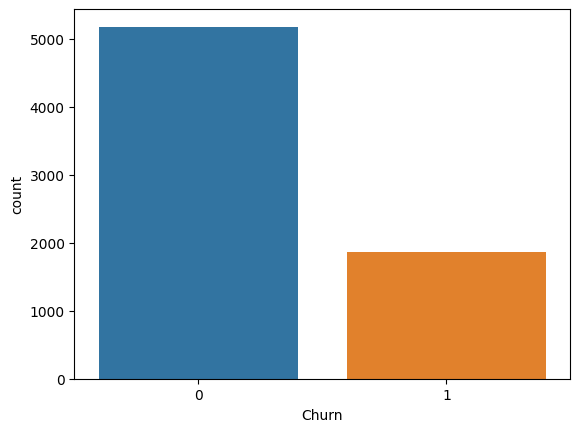

In [ ]:
sns.countplot(x="Churn",data=data)

In [ ]:
data["Churn"].value_counts()/data["Churn"].shape[0]

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [ ]:
data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
from sklearn.utils import resample
df_0=data[data["Churn"]==0]
df_1=data[data["Churn"]==1]

In [ ]:
df_1_upsample=resample(df_1,n_samples=4000,random_state=123)

In [ ]:
data1=pd.concat([df_0,df_1_upsample])

In [ ]:
data1["Churn"].value_counts()/data1["Churn"].shape[0]

0    0.563985
1    0.436015
Name: Churn, dtype: float64

In [ ]:
x=data1.drop(["customerID","Churn"],axis=1)
y=data1["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#criterion = entropy or gini
model=DecisionTreeClassifier(criterion="entropy",max_depth=13,class_weight={0:0.563985,1:0.436015})

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.563985, 1: 0.436015},
                       criterion='entropy', max_depth=13)

In [ ]:
model.score(x_train,y_train)

0.9228777762637962

In [ ]:
model.score(x_test,y_test)

0.8147138964577657

In [ ]:
model.get_depth()

13

In [ ]:
yhat=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,yhat))

[[846 203]
 [137 649]]


<Figure size 400x300 with 0 Axes>

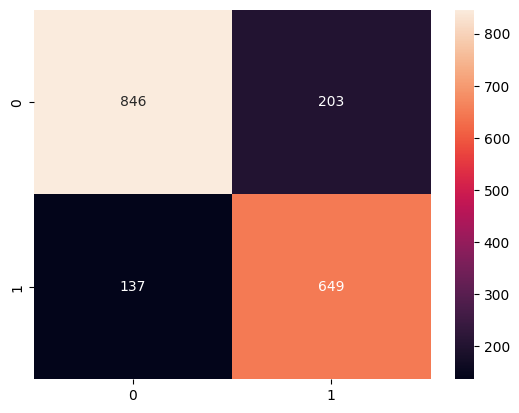

<Figure size 400x300 with 0 Axes>

In [ ]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True,fmt="0.0f")
plt.figure(figsize=(4,3))

In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1049
           1       0.76      0.83      0.79       786

    accuracy                           0.81      1835
   macro avg       0.81      0.82      0.81      1835
weighted avg       0.82      0.81      0.82      1835



In [ ]:
import graphviz
from sklearn import tree

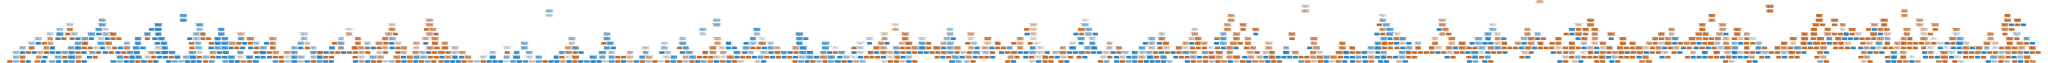

In [ ]:
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
feature_names=x.columns,
class_names=str(y),
filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#n_estimators is the no of decision trees ; max_feature= max features used to create 1 decison tree
model1=RandomForestClassifier(n_estimators=50,criterion="entropy",max_features=6,class_weight={0:0.563985,1:0.436015})

In [ ]:
model1.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.563985, 1: 0.436015},
                       criterion='entropy', max_features=6, n_estimators=50)

In [ ]:
model1.score(x_train,y_train)

0.9982286415042921

In [ ]:
model1.score(x_test,y_test)

0.8735694822888284

In [ ]:
yhat=model1.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,yhat))

[[892 157]
 [ 75 711]]


In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1049
           1       0.82      0.90      0.86       786

    accuracy                           0.87      1835
   macro avg       0.87      0.88      0.87      1835
weighted avg       0.88      0.87      0.87      1835

